# **Air Quality Index:  Time Series**

Performed by:


1.   Rahul Mallya - PES1UG20CS318
2.   Rohit Roshan - PES1UG20CS355
3.   Rohith Reddy - PES1UG20CS354





In [1]:
!pip install statsmodels==0.13.5

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/work/new_data.csv')
data['Date'] = pd.to_datetime(data['Date'])

#To fill null and missing values with previous or next values.
data = data.bfill()
data = data.ffill()

### Adding parameters for nitrogen based, particulate based and other miscellaneous into one column respectfully

In [4]:

data['N'] = data['NO']+data['NO2']+data['NOx']
data['PM'] = data['PM2.5']+data['PM10']
data['misc'] = data['Benzene']+data['Toluene']+data['Xylene']

### Creating pivot tables to help while using aggregate functions

In [5]:
data_NH3 = data.pivot_table(values = 'NH3', index =['Date'], columns = 'City')
data_CO = data.pivot_table(values = 'CO', index =['Date'], columns = 'City')
data_O3 = data.pivot_table(values = 'O3', index =['Date'], columns = 'City')
data_misc = data.pivot_table(values = 'misc', index =['Date'], columns = 'City')
data_PM = data.pivot_table(values = 'PM', index =['Date'], columns = 'City')
data_N = data.pivot_table(values = 'N', index =['Date'], columns = 'City')
data_SO2 = data.pivot_table(values = 'SO2', index =['Date'], columns = 'City')
data_AQI = data.pivot_table(values = 'AQI', index =['Date'], columns = 'City')

### 

### Resample data to end of that particular month values.

In [6]:
data_NH3 = data_NH3.resample(rule='MS').mean()
data_CO = data_CO.resample(rule='MS').mean()
data_O3 = data_O3.resample(rule='MS').mean()
data_misc = data_misc.resample(rule='MS').mean()
data_PM = data_PM.resample(rule='MS').mean()
data_N = data_N.resample(rule='MS').mean()
data_SO2 = data_SO2.resample(rule='MS').mean()
data_AQI = data_AQI.resample(rule='MS').mean()

In [7]:
data_AQI['India_NH3'] = data_NH3.mean(axis=1)
data_AQI['India_CO'] = data_CO.mean(axis=1)
data_AQI['India_O3'] = data_O3.mean(axis=1)
data_AQI['India_misc'] = data_misc.mean(axis=1)
data_AQI['India_PM'] = data_PM.mean(axis=1)
data_AQI['India_N'] = data_N.mean(axis=1)
data_AQI['India_SO2'] = data_SO2.mean(axis=1)
data_AQI['India_AQI'] = data_AQI.mean(axis=1)

In [8]:
data_AQI.reset_index()
dataframe = data_AQI[['India_AQI','India_PM', 'India_N', 'India_misc','India_NH3', 'India_CO', 'India_SO2', 'India_O3']]

### Decomposing Time Series for each parameter

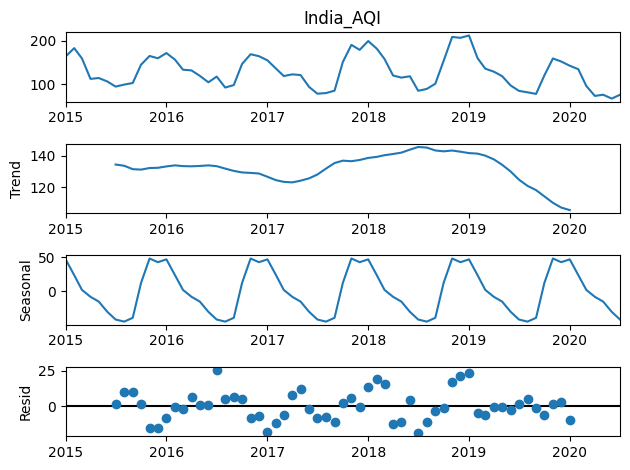

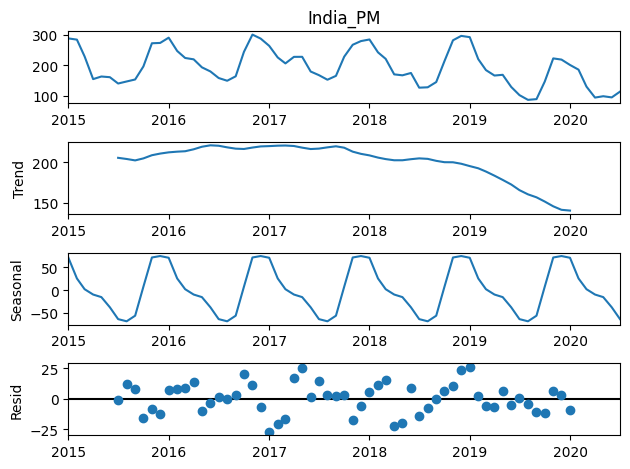

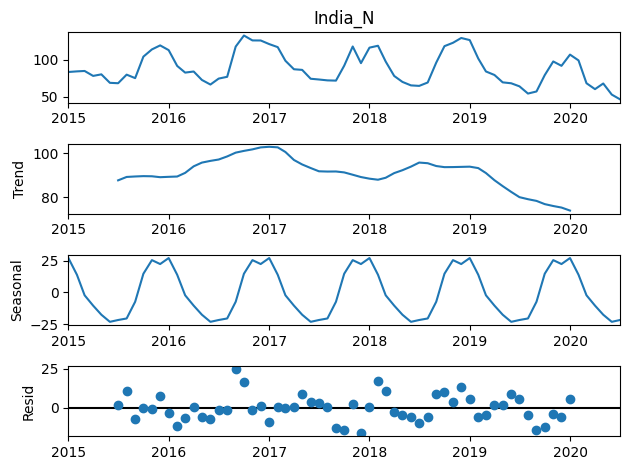

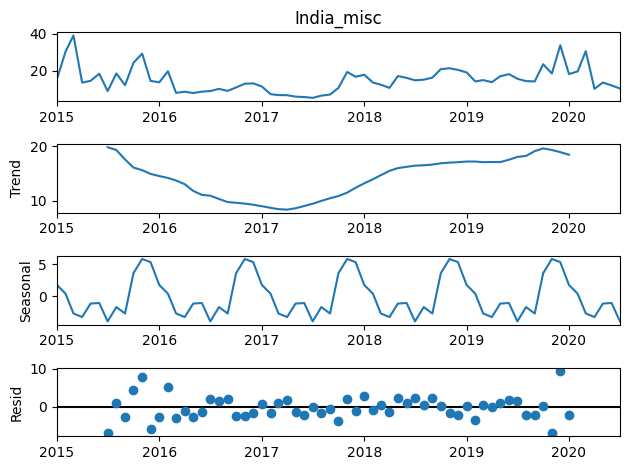

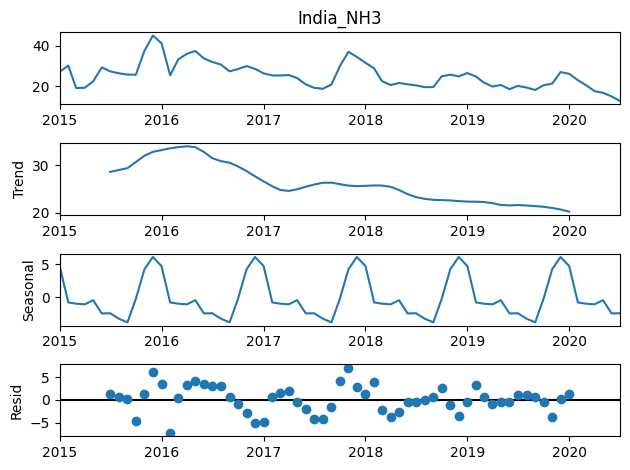

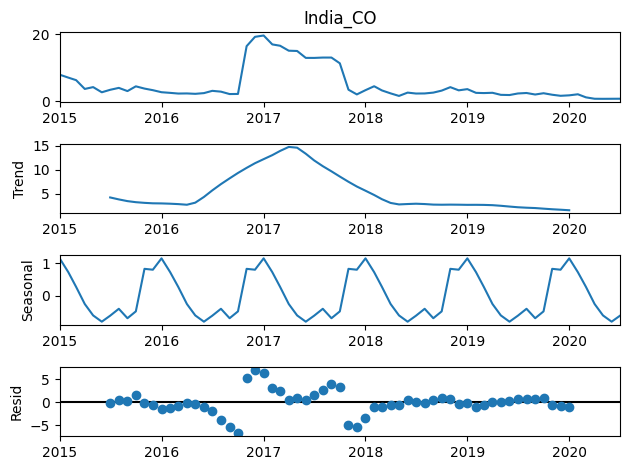

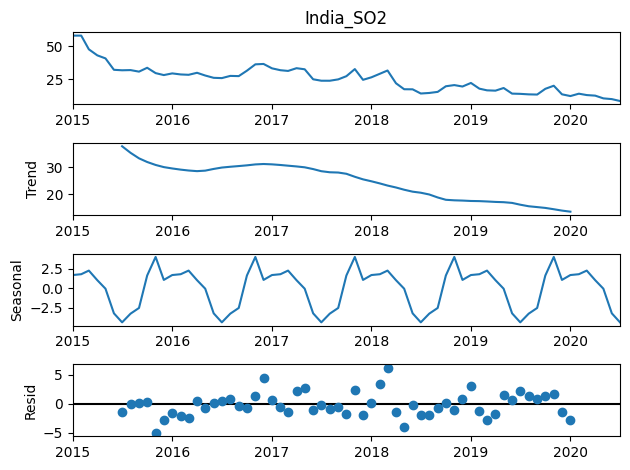

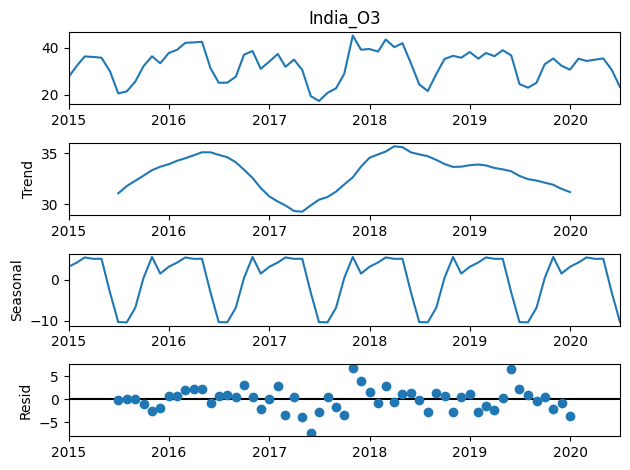

In [9]:
res_AQI = sm.tsa.seasonal_decompose(dataframe['India_AQI'], model = 'additive').plot()
res_PM = sm.tsa.seasonal_decompose(dataframe['India_PM'], model = 'additive').plot()
res_N = sm.tsa.seasonal_decompose(dataframe['India_N'], model = 'additive').plot()
res_misc = sm.tsa.seasonal_decompose(dataframe['India_misc'], model = 'additive').plot()
res_NH3 = sm.tsa.seasonal_decompose(dataframe['India_NH3'], model = 'additive').plot()
res_CO = sm.tsa.seasonal_decompose(dataframe['India_CO'], model = 'additive').plot()
res_SO2 = sm.tsa.seasonal_decompose(dataframe['India_SO2'], model = 'additive').plot()
res_O3 = sm.tsa.seasonal_decompose(dataframe['India_O3'], model = 'additive').plot()

In [10]:
print("AQI = ", sm.tsa.adfuller(data_AQI['India_AQI'], autolag = 'AIC')[1],
      "PM = ", sm.tsa.adfuller(data_AQI['India_PM'], autolag = 'AIC')[1],
      "N = ", sm.tsa.adfuller(data_AQI['India_N'], autolag = 'AIC')[1],
      "misc = ", sm.tsa.adfuller(data_AQI['India_misc'], autolag = 'AIC')[1],
      "NH3 = ", sm.tsa.adfuller(data_AQI['India_NH3'], autolag = 'AIC')[1],
      "CO = ", sm.tsa.adfuller(data_AQI['India_CO'], autolag = 'AIC')[1],
      "SO2 = ", sm.tsa.adfuller(data_AQI['India_SO2'], autolag = 'AIC')[1],
      "O3 = ", sm.tsa.adfuller(data_AQI['India_O3'], autolag = 'AIC')[1])
#adf, pval, usedlag, nobs, critical values, icbest, resstore

AQI =  0.9500064521015761 PM =  0.9710711274667021 N =  1.5507383575275782e-06 misc =  0.018215964694843313 NH3 =  0.027279711067909142 CO =  0.21678498291954718 SO2 =  0.042085677350239936 O3 =  3.2967976137586138e-06


### Visualizing the variables

<AxesSubplot: xlabel='City', ylabel='City'>

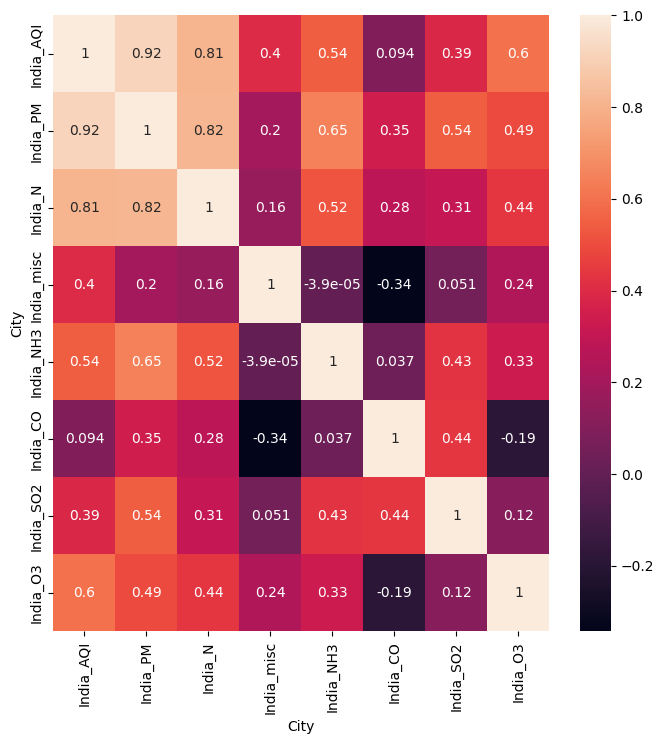

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(dataframe.corr(), annot = True)

We could observe trend and seasonality in many of the variables

###  Performing differencing on non stationary variables

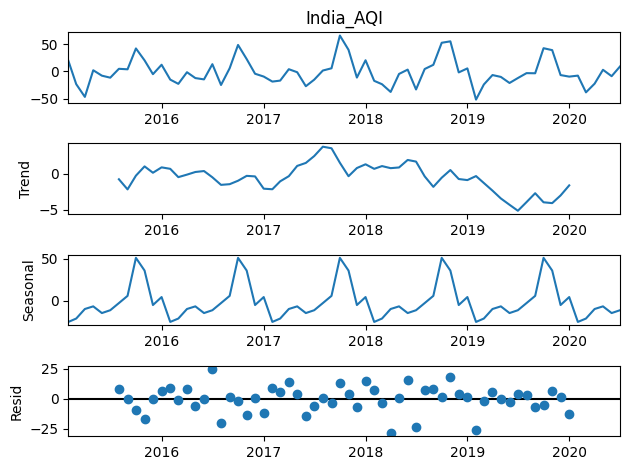

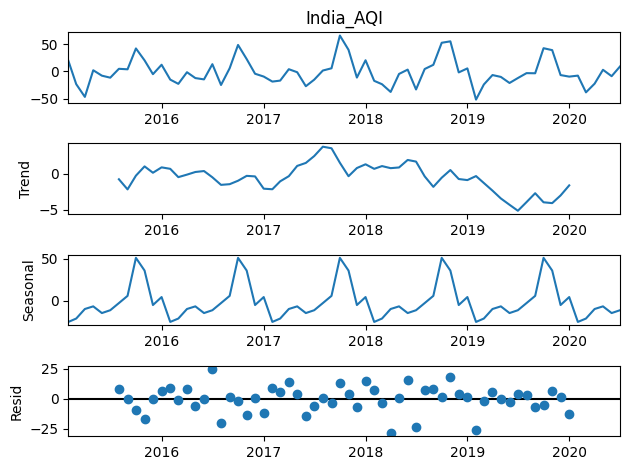

In [12]:

diff_city_AQI = data_AQI['India_AQI'].diff(periods = 1)
diff_city_AQI.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_AQI, model = 'additive').plot()

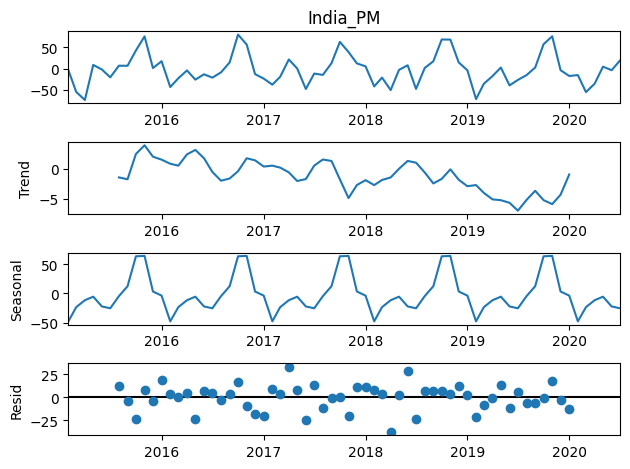

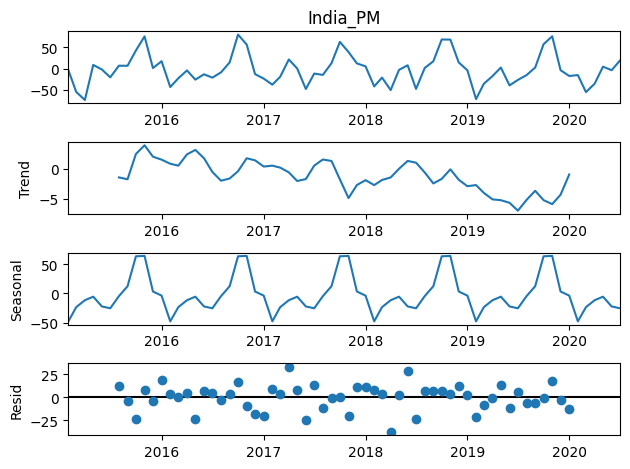

In [13]:
diff_city_PM = data_AQI['India_PM'].diff(periods = 1)
diff_city_PM.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_PM, model = 'additive').plot()

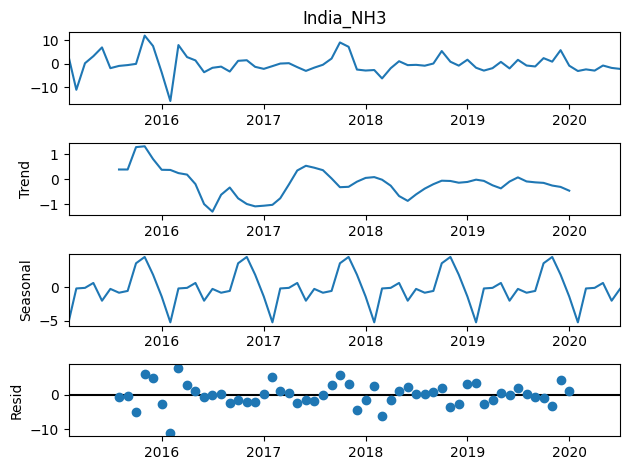

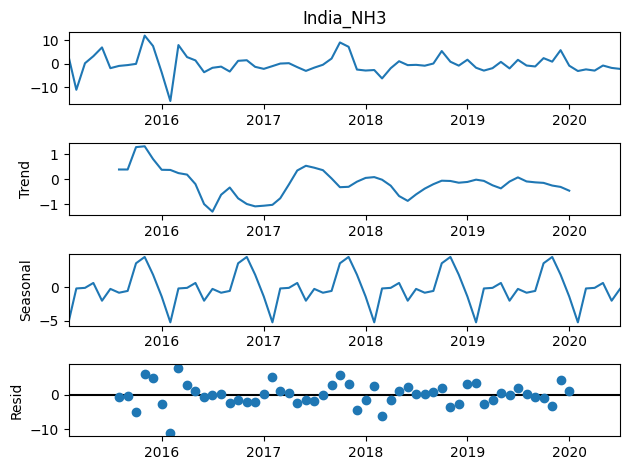

In [14]:
diff_city_NH3 = data_AQI['India_NH3'].diff(periods = 1)
diff_city_NH3.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_NH3, model = 'additive').plot()

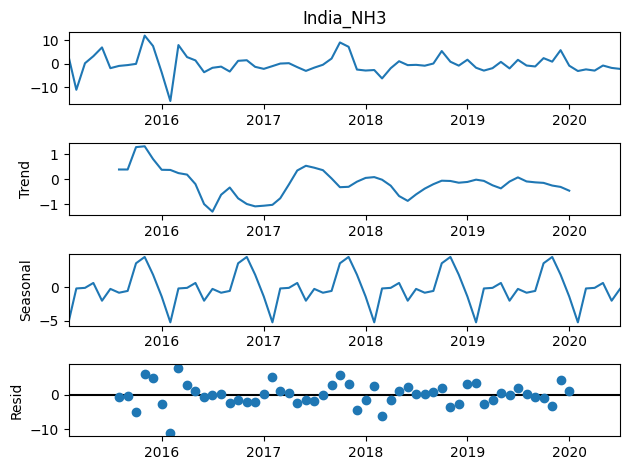

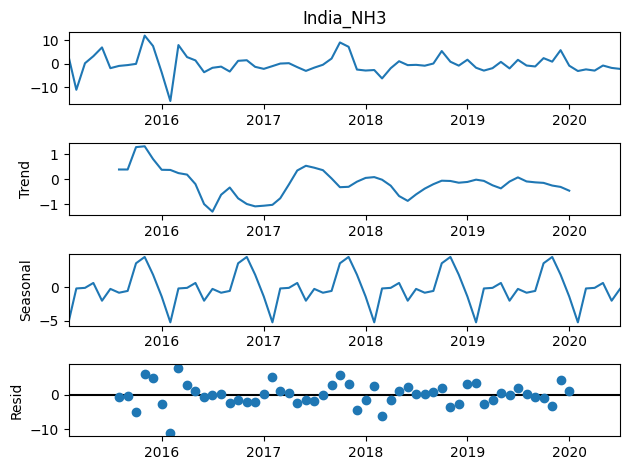

In [15]:
diff_city_SO2 = data_AQI['India_SO2'].diff(periods = 1)
diff_city_SO2.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_NH3, model = 'additive').plot()

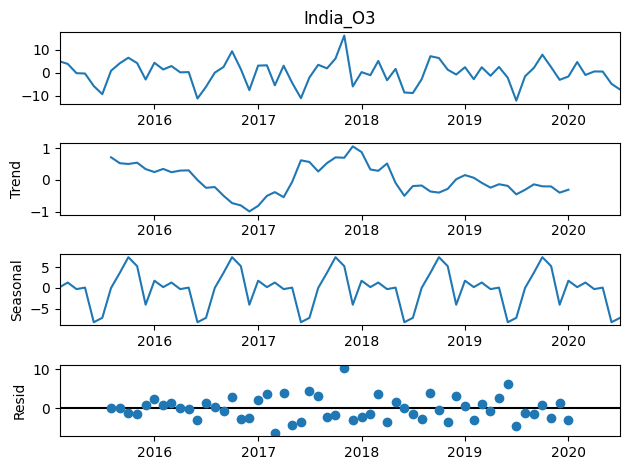

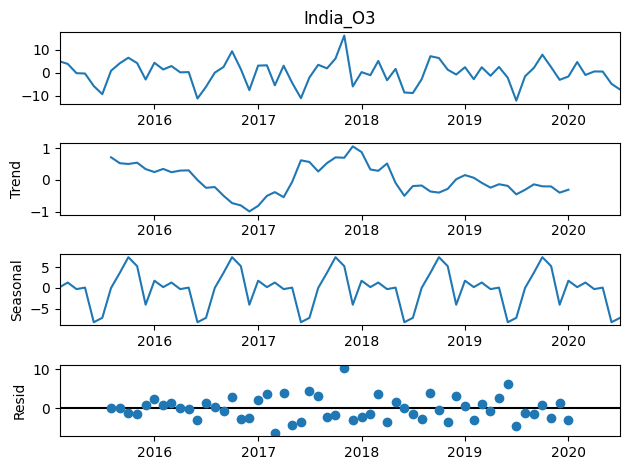

In [16]:
diff_city_O3 = data_AQI['India_O3'].diff(periods = 1)
diff_city_O3.dropna(inplace = True)
sm.tsa.seasonal_decompose(diff_city_O3, model = 'additive').plot()

### Augmented Dickey Fuller test

In [17]:
print("AQI = ", sm.tsa.adfuller(diff_city_AQI, autolag = 'AIC')[1],
      "PM = ", sm.tsa.adfuller(diff_city_PM, autolag = 'AIC')[1],
      "N = ", sm.tsa.adfuller(data_AQI['India_N'], autolag = 'AIC')[1],
      "NH3 = ", sm.tsa.adfuller(diff_city_NH3, autolag = 'AIC')[1],
      "SO2 = ", sm.tsa.adfuller(diff_city_SO2, autolag = 'AIC')[1],
      "O3 = ", sm.tsa.adfuller(diff_city_O3, autolag = 'AIC')[1])

AQI =  9.531494684056269e-09 PM =  9.080094002207307e-10 N =  1.5507383575275782e-06 NH3 =  1.1308162114854944e-08 SO2 =  1.872078260197607e-08 O3 =  0.018984005400704624


We can see that all the variables are now stationary

### ACF and PACF Plots to obtain values of p and q for models

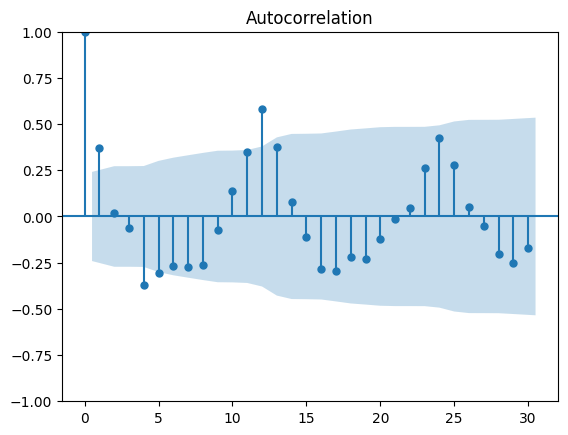

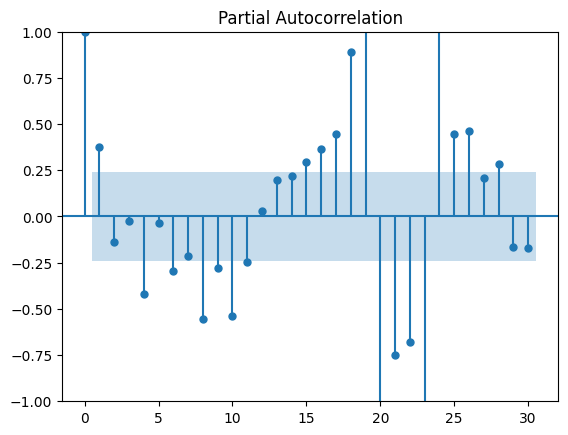

In [18]:
ga1 = sm.graphics.tsa.plot_acf(diff_city_AQI, lags=30)
gp1 = sm.graphics.tsa.plot_pacf(diff_city_AQI,lags=30)

p and q value for AQI = 1,1

p and q value for PM= 1,1

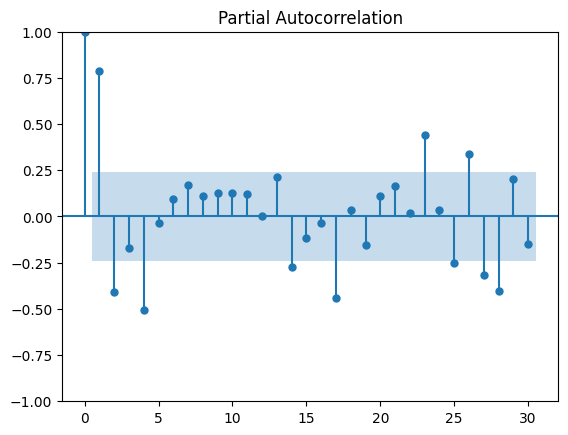

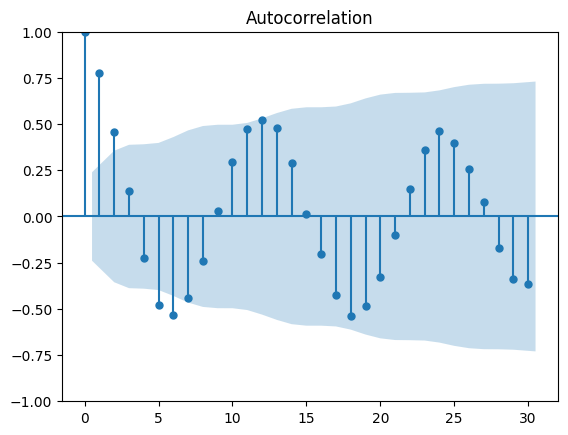

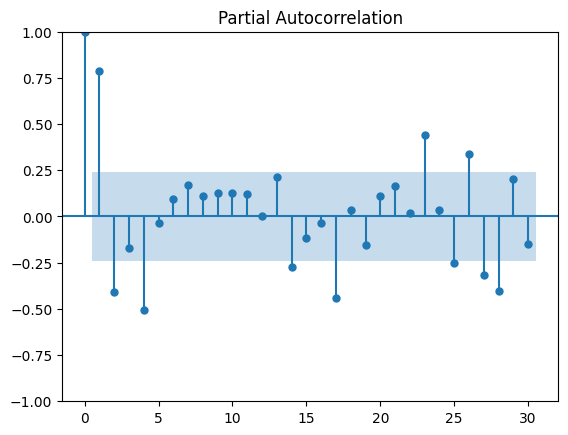

In [19]:
sm.graphics.tsa.plot_acf(data_AQI['India_N'], lags=30)
sm.graphics.tsa.plot_pacf(data_AQI['India_N'],lags=30)

p and q value of N= 2,2

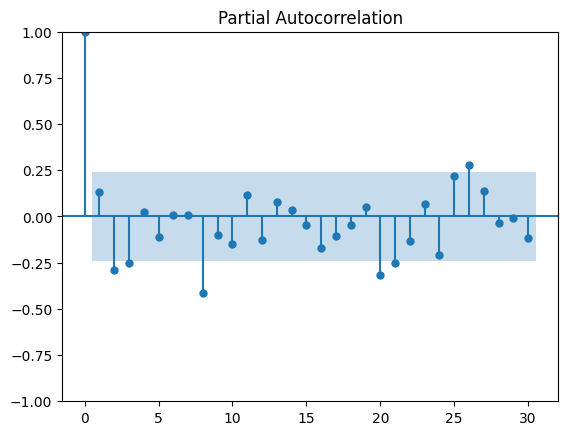

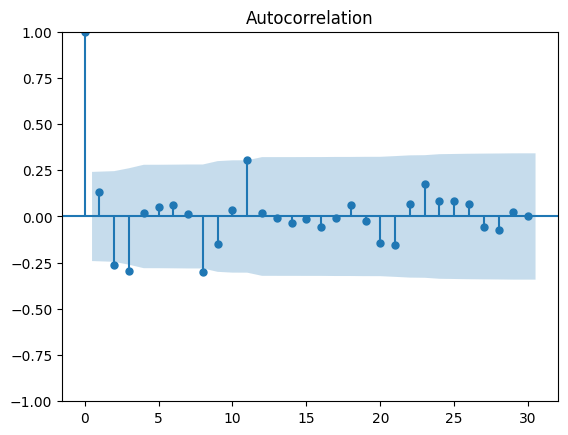

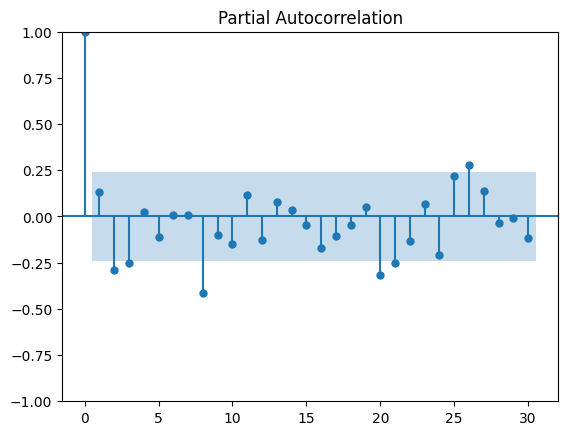

In [20]:
sm.graphics.tsa.plot_acf(diff_city_NH3, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_NH3,lags=30)

p and q for NH3= 1,1

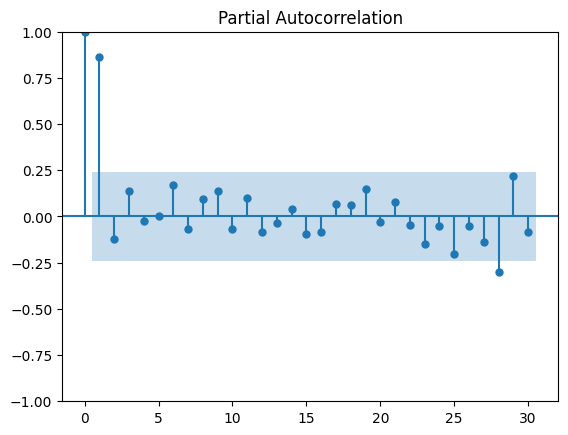

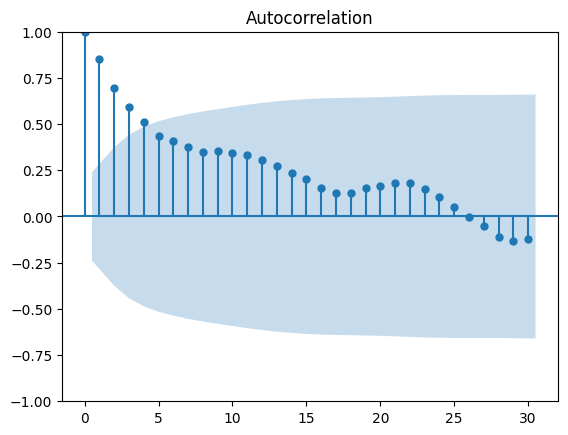

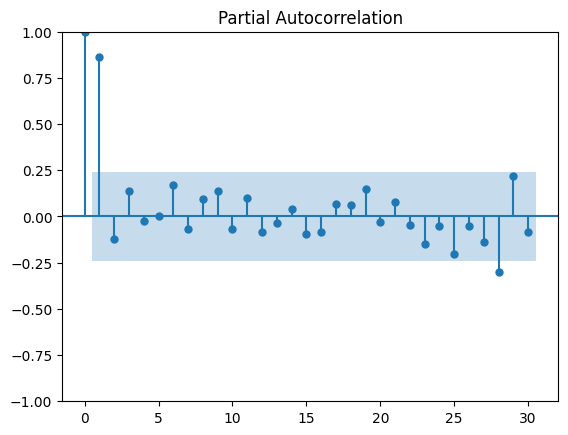

In [21]:
sm.graphics.tsa.plot_acf(data_AQI['India_SO2'], lags=30)
sm.graphics.tsa.plot_pacf(data_AQI['India_SO2'],lags=30)

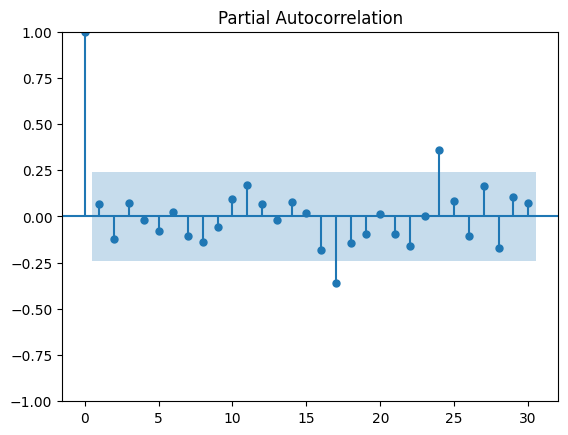

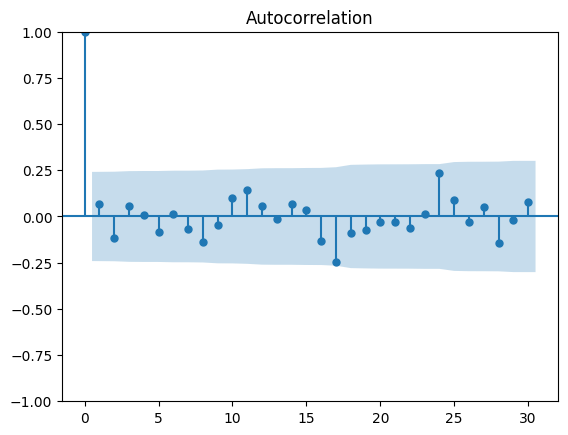

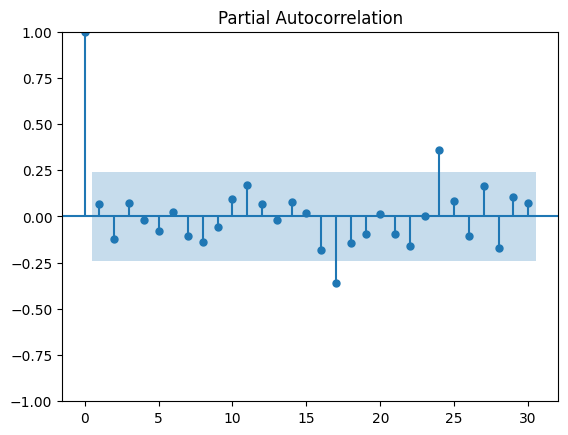

In [22]:
sm.graphics.tsa.plot_acf(diff_city_SO2, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_SO2,lags=30)

p and q for so2= 2,2

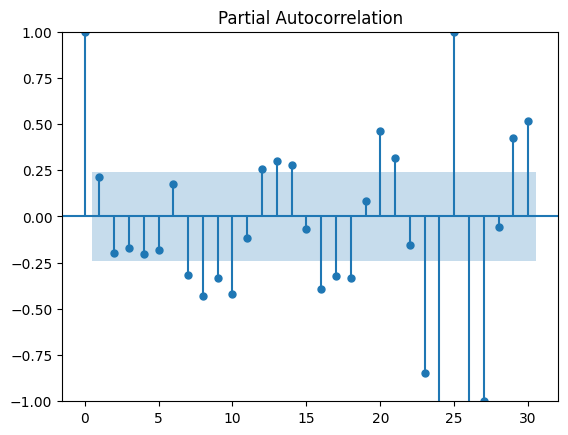

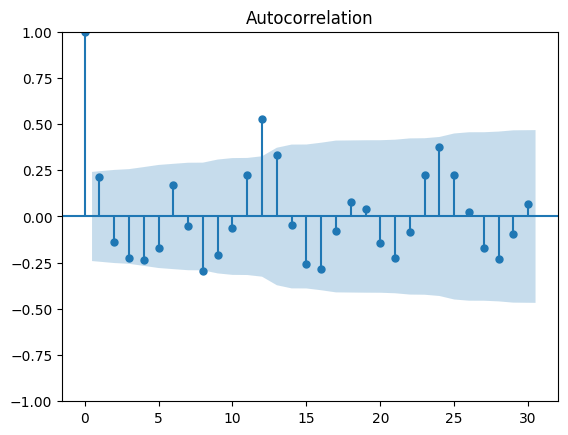

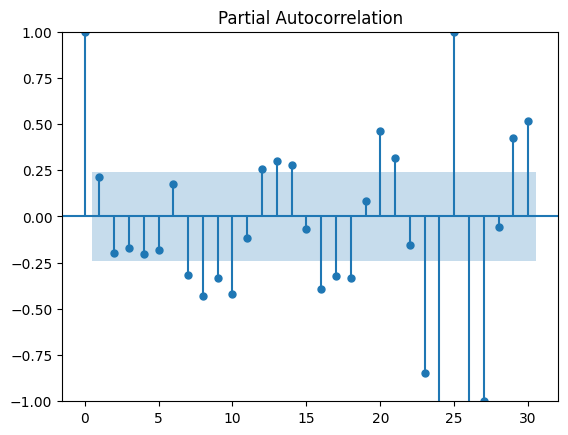

In [23]:
sm.graphics.tsa.plot_acf(diff_city_O3, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_O3,lags=30)

p and q for o3= 1,1

### Splitting Data into training and testing sets

In [24]:
start = '2018-01-01'
end = '2018-05-01'
train = data_AQI[:start]
test = data_AQI[start:end]

### Applying SARIMAX function with necessary parameters

In [25]:
modelAQI = sm.tsa.SARIMAX(train['India_AQI'],order = (1,1,1), seasonal_order=(1,0,1,12))
modelPM = sm.tsa.SARIMAX(train['India_PM'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelN = sm.tsa.SARIMAX(train['India_N'], order = (2,0,2), seasonal_order=(1,1,1,12))
modelNH3 = sm.tsa.SARIMAX(train['India_NH3'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelSO2 = sm.tsa.SARIMAX(train['India_SO2'], order = (2,1,2), seasonal_order=(1,1,1,12))
modelO3 = sm.tsa.SARIMAX(train['India_O3'], order = (1,1,1), seasonal_order=(1,1,1,12))

In [26]:
fitAQI = modelAQI.fit()
fitPM = modelPM.fit()
fitN = modelN.fit()
fitNH3 = modelNH3.fit()
fitSO2 = modelSO2.fit()
fitO3 = modelO3.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32423D+00    |proj g|=  3.03890D-01
 This problem is unconstrained.

At iterate    5    f=  4.20612D+00    |proj g|=  6.30023D-02

At iterate   10    f=  4.13642D+00    |proj g|=  5.02420D-03

At iterate   15    f=  4.13624D+00    |proj g|=  6.57958D-03

At iterate   20    f=  4.13218D+00    |proj g|=  1.23776D-02

At iterate   25    f=  4.13159D+00    |proj g|=  9.35538D-03

At iterate   30    f=  4.13039D+00    |proj g|=  3.18359D-03

At iterate   35    f=  4.13008D+00    |proj g|=  2.47520D-03

At iterate   40    f=  4.12999D+00    |proj g|=  1.39364D-03

At iterate   45    f=  4.12995D+00    |proj g|=  2.21884D-03

At iterate   50    f=  4.12994D+00    |proj g|=  2.24981D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number

In [27]:
pred_AQI = fitAQI.predict(start = start, end = end, dynamic = True)
pred_PM = fitPM.predict(start = start, end = end, dynamic = True)
pred_N = fitN.predict(start = start, end = end, dynamic = True)
pred_NH3 = fitNH3.predict(start = start, end = end, dynamic = True)
pred_SO2 = fitSO2.predict(start = start, end = end, dynamic = True)
pred_O3 = fitO3.predict(start = start, end = end, dynamic = True)

In [28]:
from sklearn.metrics import mean_squared_error
RMSE_AQI=np.sqrt(mean_squared_error(pred_AQI,test['India_AQI'][start:end]))
print('RMSE for AQI= ',RMSE_AQI)
mapeAQI= np.mean(np.abs((pred_AQI- test['India_AQI'][start:end]) / test['India_AQI'][start:end])) * 100
print('MAPE = ', mapeAQI)

RMSE_PM=np.sqrt(mean_squared_error(pred_PM,test['India_PM'][start:end]))
print('RMSE for PM= ',RMSE_PM)
mapePM= np.mean(np.abs((pred_PM- test['India_PM'][start:end]) / test['India_PM'][start:end])) * 100
print('MAPE = ', mapePM)

RMSE_N=np.sqrt(mean_squared_error(pred_N,test['India_N'][start:end]))
print('RMSE for N= ',RMSE_N)
mapeN= np.mean(np.abs((pred_N- test['India_N'][start:end]) / test['India_N'][start:end])) * 100
print('MAPE = ', mapeN)

RMSE_NH3=np.sqrt(mean_squared_error(pred_NH3,test['India_NH3'][start:end]))
print('RMSE for NH3= ',RMSE_NH3)
mapeNH3= np.mean(np.abs((pred_NH3- test['India_NH3'][start:end]) / test['India_NH3'][start:end])) * 100
print('MAPE = ', mapeNH3)

RMSE_SO2=np.sqrt(mean_squared_error(pred_SO2,test['India_SO2'][start:end]))
print('RMSE for SO2= ',RMSE_SO2)
mapeSO2= np.mean(np.abs((pred_SO2- test['India_SO2'][start:end]) / test['India_SO2'][start:end])) * 100
print('MAPE = ', mapeSO2)

RMSE_O3=np.sqrt(mean_squared_error(pred_O3,test['India_O3'][start:end]))
print('RMSE for O3= ',RMSE_O3)
mapeO3= np.mean(np.abs((pred_O3- test['India_O3'][start:end]) / test['India_O3'][start:end])) * 100
print('MAPE = ', mapeO3)

RMSE for AQI=  20.064726001174538
MAPE =  12.3867950202482
RMSE for PM=  41.90978940332056
MAPE =  18.59485942479916
RMSE for N=  19.97723618168515
MAPE =  14.144145930814158
RMSE for NH3=  4.4503037107821255
MAPE =  16.284185913808386
RMSE for SO2=  6.933579529990966
MAPE =  18.61363069615139
RMSE for O3=  3.661727199778086
MAPE =  7.912348083658734


In [29]:
start = '2019-06-01'
end = '2020-07-01'
train = data_AQI[:start]
test = data_AQI[start:]

In [30]:
modelAQI = sm.tsa.SARIMAX(train['India_AQI'],order = (1,1,1), seasonal_order=(1,0,1,12))
modelPM = sm.tsa.SARIMAX(train['India_PM'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelN = sm.tsa.SARIMAX(train['India_N'], order = (2,0,2), seasonal_order=(1,1,1,12))
modelNH3 = sm.tsa.SARIMAX(train['India_NH3'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelSO2 = sm.tsa.SARIMAX(train['India_SO2'], order = (2,1,2), seasonal_order=(1,1,1,12))
modelO3 = sm.tsa.SARIMAX(train['India_O3'], order = (1,1,1), seasonal_order=(1,1,1,12))

In [31]:
fitAQI = modelAQI.fit()
fitPM = modelPM.fit()
fitN = modelN.fit()
fitNH3 = modelNH3.fit()
fitSO2 = modelSO2.fit()
fitO3 = modelO3.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36958D+00    |proj g|=  7.07539D-02
 This problem is unconstrained.

At iterate    5    f=  4.31954D+00    |proj g|=  2.88695D-02

At iterate   10    f=  4.21849D+00    |proj g|=  4.01977D-02

At iterate   15    f=  4.19557D+00    |proj g|=  5.12279D-03

At iterate   20    f=  4.19496D+00    |proj g|=  3.03298D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   1.101D-06   4.195D+00
  F =   

In [33]:
pred_AQI = fitAQI.predict(start = start, end = end, dynamic = True)
pred_PM = fitPM.predict(start = start, end = end, dynamic = True)
pred_N = fitN.predict(start = start, end = end, dynamic = True)
pred_NH3 = fitNH3.predict(start = start, end = end, dynamic = True)
pred_SO2 = fitSO2.predict(start = start, end = end, dynamic = True)
pred_O3 = fitO3.predict(start = start, end = end, dynamic = True)

In [34]:
from sklearn.metrics import mean_squared_error
print('Errors for covid data')
RMSE_AQI1=np.sqrt(mean_squared_error(pred_AQI,test['India_AQI'][start:end]))
print('RMSE for AQI= ',RMSE_AQI1)
mapeAQI1= np.mean(np.abs((pred_AQI- test['India_AQI'][start:end]) / test['India_AQI'][start:end])) * 100
print('MAPE = ', mapeAQI1)

RMSE_PM1=np.sqrt(mean_squared_error(pred_PM,test['India_PM'][start:end]))
print('RMSE for PM= ',RMSE_PM1)
mapePM1= np.mean(np.abs((pred_PM- test['India_PM'][start:end]) / test['India_PM'][start:end])) * 100
print('MAPE = ', mapePM1)

RMSE_N1=np.sqrt(mean_squared_error(pred_N,test['India_N'][start:end]))
print('RMSE for N= ',RMSE_N1)
mapeN1= np.mean(np.abs((pred_N- test['India_N'][start:end]) / test['India_N'][start:end])) * 100
print('MAPE = ', mapeN1)

RMSE_NH31=np.sqrt(mean_squared_error(pred_NH3,test['India_NH3'][start:end]))
print('RMSE for NH3= ',RMSE_NH31)
mapeNH31= np.mean(np.abs((pred_NH3- test['India_NH3'][start:end]) / test['India_NH3'][start:end])) * 100
print('MAPE = ', mapeNH31)

RMSE_SO21=np.sqrt(mean_squared_error(pred_SO2,test['India_SO2'][start:end]))
print('RMSE for SO2= ',RMSE_SO21)
mapeSO21= np.mean(np.abs((pred_SO2- test['India_SO2'][start:end]) / test['India_SO2'][start:end])) * 100
print('MAPE = ', mapeSO21)

RMSE_O31=np.sqrt(mean_squared_error(pred_O3,test['India_O3'][start:end]))
print('RMSE for O3= ',RMSE_O31)
mapeO31= np.mean(np.abs((pred_O3- test['India_O3'][start:end]) / test['India_O3'][start:end])) * 100
print('MAPE = ', mapeO31)

Errors for covid data
RMSE for AQI=  34.4409019832974
MAPE =  34.314940871760655
RMSE for PM=  55.14711755386137
MAPE =  42.95005080503142
RMSE for N=  18.212125192725708
MAPE =  24.893819214783857
RMSE for NH3=  2.959065310200115
MAPE =  13.2072249896546
RMSE for SO2=  2.8013576623807497
MAPE =  18.740738957142725
RMSE for O3=  4.3614582695310276
MAPE =  10.819095411291212


In [35]:
actual_AQI = test['India_AQI']
actual_PM = test['India_PM']
actual_NH3 = test['India_NH3']
actual_N = test['India_N']
actual_SO2 = test['India_SO2']
actual_O3 = test['India_O3']

In [36]:
actual_AQI.to_frame()
pred_AQI.to_frame()
actual_PM.to_frame()
pred_PM.to_frame()
actual_NH3.to_frame()
pred_NH3.to_frame()
actual_N.to_frame()
pred_N.to_frame()
actual_SO2.to_frame()
pred_SO2.to_frame()
actual_O3.to_frame()
pred_O3.to_frame()

,predicted_mean
2019-06-01,28.834642
2019-07-01,22.452231
2019-08-01,23.221919
2019-09-01,26.730300
2019-10-01,33.978964
2019-11-01,40.439012
2019-12-01,35.523581
2020-01-01,37.621518
2020-02-01,39.184024
2020-03-01,40.827802


<AxesSubplot: xlabel='Date'>

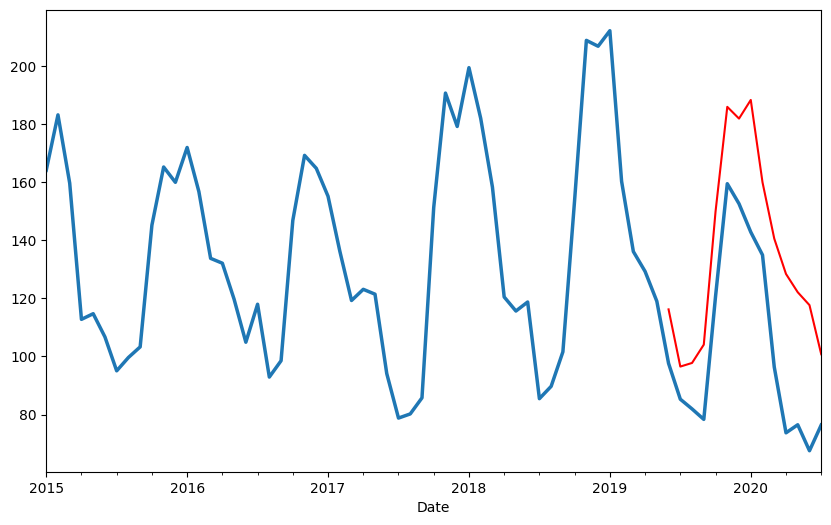

In [37]:
data_AQI['India_AQI'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)
pred_AQI.plot(kind = 'line', color = 'red')

<AxesSubplot: xlabel='Date'>

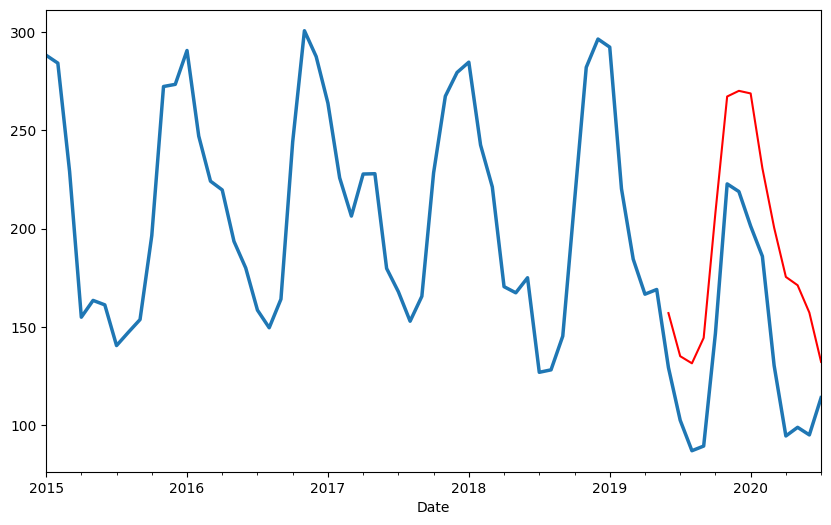

In [38]:
data_AQI['India_PM'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)
pred_PM.plot(kind = 'line', color = 'red')

<AxesSubplot: xlabel='Date'>

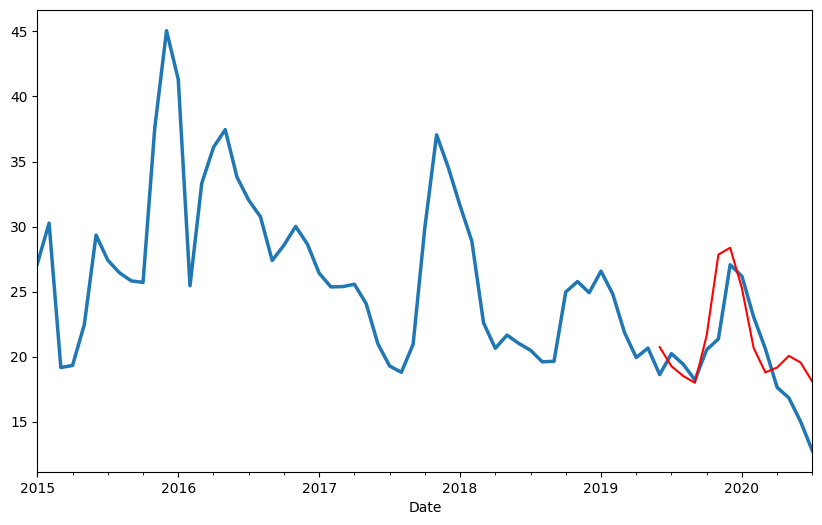

In [39]:
data_AQI['India_NH3'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)
pred_NH3.plot(kind = 'line', color = 'red')

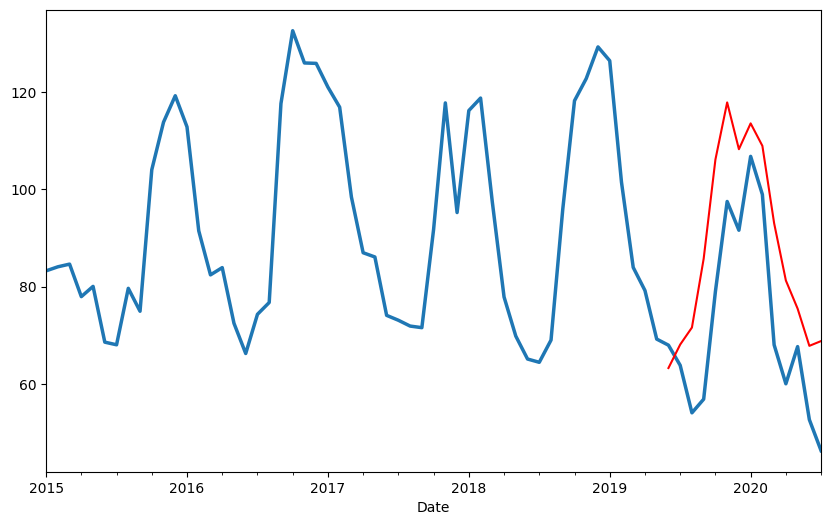

In [40]:
data_AQI['India_N'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)
pred_N.plot(kind = 'line', color = 'red')
plt.savefig('final_aqi.png')

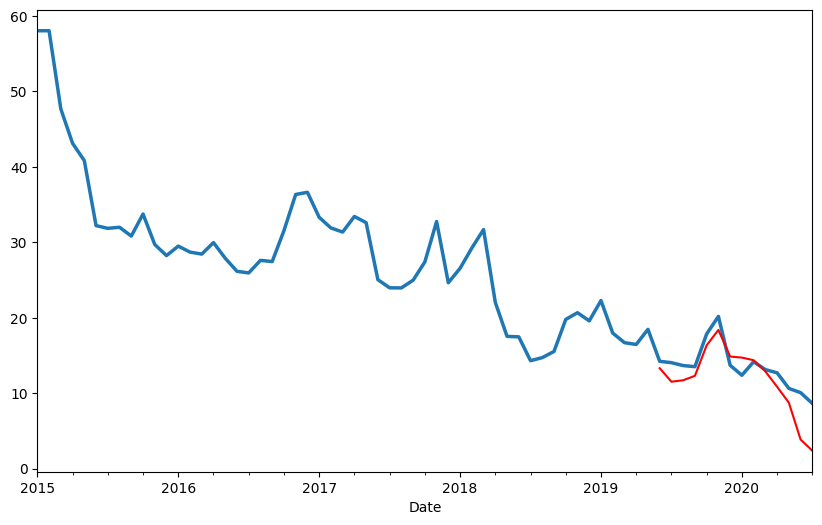

In [43]:
data_AQI['India_SO2'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)
pred_SO2.plot(kind = 'line', color = 'red')
plt.savefig('final_aqi.png')

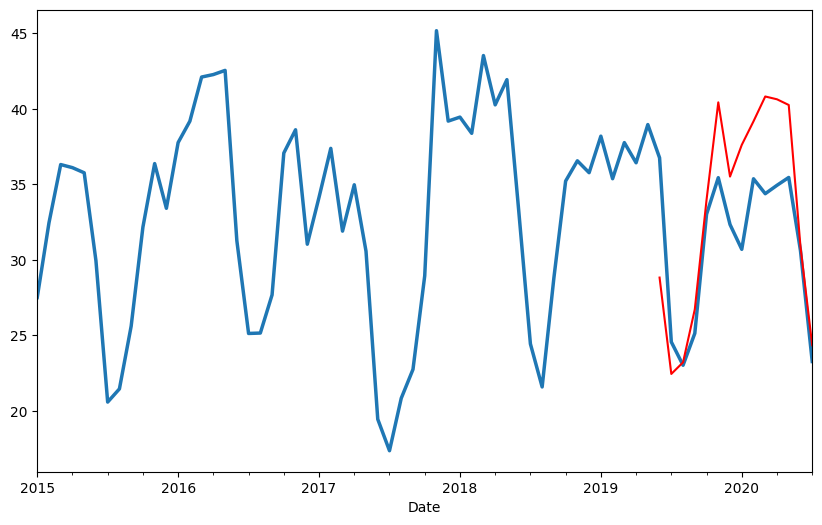

In [44]:
data_AQI['India_O3'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)
pred_O3.plot(kind = 'line', color = 'red')
plt.savefig('final_aqi.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6920ec3-e3dd-466f-8f01-821cfb33c0ba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>